In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train = pd.read_csv('train.csv')
test = pd.read_csv('tested.csv')

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [9]:
train.drop('Cabin', axis=1, inplace = True)
test.drop('Cabin', axis=1, inplace = True)

In [10]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[0]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [11]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis=1)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [14]:
sexTrain =pd.get_dummies(train['Sex'], drop_first = True)
sexTest =pd.get_dummies(test['Sex'], drop_first = True)

In [15]:
sexTrain

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [16]:
embarkTrain = pd.get_dummies(train['Embarked'], drop_first = True)
embarkTest = pd.get_dummies(test['Embarked'], drop_first = True)

In [17]:
embarkTrain

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [18]:
train = pd.concat([train,sexTrain,embarkTrain], axis = 1)
test =  pd.concat([test,sexTest,embarkTest], axis = 1)

In [19]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [20]:
train['Name'].apply(lambda s : s.split(',')[1].split('.')[0])
test['Name'].apply(lambda s : s.split(',')[1].split('.')[0])

0           Mr
1          Mrs
2           Mr
3           Mr
4          Mrs
        ...   
413         Mr
414       Dona
415         Mr
416         Mr
417     Master
Name: Name, Length: 418, dtype: object

In [21]:
def impute_name(name):
    if(name==' Mr'):
        return 1
    elif(name==' Miss'):
        return 2
    elif(name==' Mrs'):
        return 3
    elif(name==' Master'):
        return 4
    elif(name==' Dr'):
        return 5
    else:
        
        return 0

In [22]:
train['Name']=train['Name'].apply(lambda s : s.split(',')[1].split('.')[0]).apply(impute_name)
test['Name']=test['Name'].apply(lambda s : s.split(',')[1].split('.')[0]).apply(impute_name)

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    int64  
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
 11  male         418 non-null    uint8  
 12  Q            418 non-null    uint8  
 13  S            418 non-null    uint8  
dtypes: float64(2), int64(6), object(3), uint8(3)
memory usage: 37.3+ KB


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  male         891 non-null    uint8  
 12  Q            891 non-null    uint8  
 13  S            891 non-null    uint8  
dtypes: float64(2), int64(6), object(3), uint8(3)
memory usage: 79.3+ KB


In [25]:
rows_with_nan = []
for index, row in test.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

print(rows_with_nan)

[152]


In [26]:
test.iloc[152,9] = test['Fare'].median()

In [27]:
train.drop(['Ticket','Sex', 'Embarked'], axis=1, inplace=True)
test.drop(['Ticket','Sex', 'Embarked'], axis=1, inplace=True)

In [28]:
train.drop(['Name'], axis=1, inplace=True)
test.drop(['Name'], axis=1, inplace=True)

In [29]:
train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)

In [30]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [31]:
test

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,34.5,0,0,7.8292,1,1,0
1,1,3,47.0,1,0,7.0000,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0
3,0,3,27.0,0,0,8.6625,1,0,1
4,1,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,0,3,24.0,0,0,8.0500,1,0,1
414,1,1,39.0,0,0,108.9000,0,0,0
415,0,3,38.5,0,0,7.2500,1,0,1
416,0,3,24.0,0,0,8.0500,1,0,1


In [71]:
X_train = train.drop('Survived', axis=1)
y_train= train['Survived']
X_test = test.drop('Survived', axis=1)
y_test = test['Survived']

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
predictions = dtree.predict(X_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(round(dtree.score(X_train, y_train)*100, 2))

[[211  55]
 [ 40 112]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       266
           1       0.67      0.74      0.70       152

    accuracy                           0.77       418
   macro avg       0.76      0.77      0.76       418
weighted avg       0.78      0.77      0.77       418

98.09


In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(round(rfc.score(X_train, y_train)*100, 2))

[[228  38]
 [ 38 114]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       266
           1       0.75      0.75      0.75       152

    accuracy                           0.82       418
   macro avg       0.80      0.80      0.80       418
weighted avg       0.82      0.82      0.82       418

98.09


In [77]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(round(logmodel.score(X_train, y_train)*100, 2))

[[249  17]
 [ 10 142]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       266
           1       0.89      0.93      0.91       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.93       418
weighted avg       0.94      0.94      0.94       418

79.69


In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

WITH K=1


[[182  84]
 [ 72  80]]


              precision    recall  f1-score   support

           0       0.72      0.68      0.70       266
           1       0.49      0.53      0.51       152

    accuracy                           0.63       418
   macro avg       0.60      0.61      0.60       418
weighted avg       0.63      0.63      0.63       418



In [41]:

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

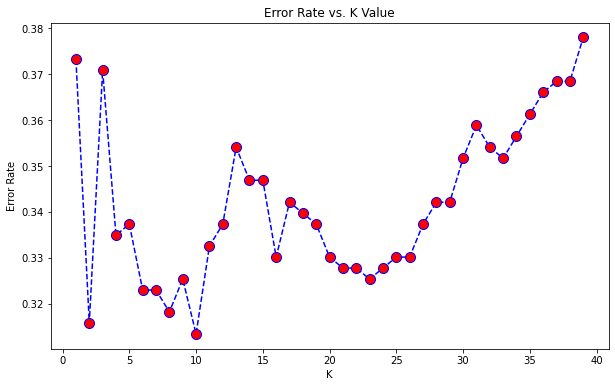

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [43]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=10


[[216  50]
 [ 81  71]]


              precision    recall  f1-score   support

           0       0.73      0.81      0.77       266
           1       0.59      0.47      0.52       152

    accuracy                           0.69       418
   macro avg       0.66      0.64      0.64       418
weighted avg       0.68      0.69      0.68       418



In [44]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(round(clf.score(X_train, y_train)*100, 2))

[[232  34]
 [111  41]]
              precision    recall  f1-score   support

           0       0.68      0.87      0.76       266
           1       0.55      0.27      0.36       152

    accuracy                           0.65       418
   macro avg       0.61      0.57      0.56       418
weighted avg       0.63      0.65      0.62       418

68.35


In [46]:
import warnings
warnings.filterwarnings('ignore')
bank = pd.read_csv('bank-additional-full.csv', sep =';')

In [47]:
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [48]:
bank_client = bank.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [49]:
# Quartiles
print('1º Quartile: ', bank_client['age'].quantile(q = 0.25))
print('2º Quartile: ', bank_client['age'].quantile(q = 0.50))
print('3º Quartile: ', bank_client['age'].quantile(q = 0.75))
print('4º Quartile: ', bank_client['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers


In [50]:
print('Numerber of outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank_client))
#Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


In [51]:
bank_client = pd.get_dummies(data = bank_client, columns = ['job'] , prefix = ['job'] , drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['marital'] , prefix = ['marital'] , drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['education'], prefix = ['education'], drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['default'] , prefix = ['default'] , drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['housing'] , prefix = ['housing'] , drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['loan'] , prefix = ['loan'] , drop_first = True)

In [52]:
bank_related = bank.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [53]:
# Quartiles
print('1º Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  644.5 are outliers


In [54]:
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')

Numerber of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


In [55]:
# Look, if the call duration is iqual to 0, then is obviously that this person didn't subscribed, 
# THIS LINES NEED TO BE DELETED LATER 
bank[(bank['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


In [56]:
bank_related = pd.get_dummies(data = bank_related, prefix = ['contact'] , columns = ['contact'] , drop_first = True)

bank_related = pd.get_dummies(data = bank_related, prefix = ['month'] , columns = ['month'] , drop_first = True)

bank_related = pd.get_dummies(data = bank_related, prefix = ['day_of_week'], columns = ['day_of_week'], drop_first = True)

In [57]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [58]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [59]:
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [60]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [61]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o, bank['y']], axis = 1)

bank_final.shape

(41188, 53)

In [62]:
bank_final

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome,y
0,56,0,0,1,0,0,0,0,0,0,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,no
1,57,0,0,0,0,0,0,1,0,0,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,no
2,37,0,0,0,0,0,0,1,0,0,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,no
3,40,0,0,0,0,0,0,0,0,0,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,no
4,56,0,0,0,0,0,0,1,0,0,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,0,0,0,1,0,0,0,0,...,-1.1,94.767,-50.8,1.028,4963.6,1,999,0,1,yes
41184,46,1,0,0,0,0,0,0,0,0,...,-1.1,94.767,-50.8,1.028,4963.6,1,999,0,1,no
41185,56,0,0,0,0,1,0,0,0,0,...,-1.1,94.767,-50.8,1.028,4963.6,2,999,0,1,no
41186,44,0,0,0,0,0,0,0,0,1,...,-1.1,94.767,-50.8,1.028,4963.6,1,999,0,1,yes


In [79]:
from sklearn.model_selection import train_test_split
X = bank_final.drop('y', axis = 1)
y = bank_final['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [80]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(round(dtree.score(X_train, y_train)*100, 2))

[[10245   733]
 [  694   685]]
              precision    recall  f1-score   support

          no       0.94      0.93      0.93     10978
         yes       0.48      0.50      0.49      1379

    accuracy                           0.88     12357
   macro avg       0.71      0.71      0.71     12357
weighted avg       0.89      0.88      0.89     12357

99.94


In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(round(rfc.score(X_train, y_train)*100, 2))

[[10567   411]
 [  756   623]]
              precision    recall  f1-score   support

          no       0.93      0.96      0.95     10978
         yes       0.60      0.45      0.52      1379

    accuracy                           0.91     12357
   macro avg       0.77      0.71      0.73     12357
weighted avg       0.90      0.91      0.90     12357

99.94


In [87]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(round(logmodel.score(X_train, y_train)*100, 2))

[[10742   236]
 [  958   421]]
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     10978
         yes       0.64      0.31      0.41      1379

    accuracy                           0.90     12357
   macro avg       0.78      0.64      0.68     12357
weighted avg       0.89      0.90      0.89     12357

90.47


In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

WITH K=1


[[10262   716]
 [  776   603]]


              precision    recall  f1-score   support

          no       0.93      0.93      0.93     10978
         yes       0.46      0.44      0.45      1379

    accuracy                           0.88     12357
   macro avg       0.69      0.69      0.69     12357
weighted avg       0.88      0.88      0.88     12357



Text(0, 0.5, 'Error Rate')

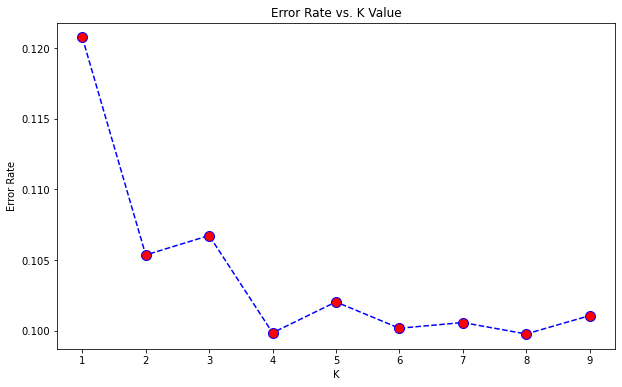

In [89]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

# Will take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
print('WITH K=4')
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

WITH K=4


[[10742   236]
 [  998   381]]


              precision    recall  f1-score   support

          no       0.91      0.98      0.95     10978
         yes       0.62      0.28      0.38      1379

    accuracy                           0.90     12357
   macro avg       0.77      0.63      0.66     12357
weighted avg       0.88      0.90      0.88     12357



In [88]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(round(clf.score(X_train, y_train)*100, 2))

[[10840   138]
 [ 1094   285]]
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     10978
         yes       0.67      0.21      0.32      1379

    accuracy                           0.90     12357
   macro avg       0.79      0.60      0.63     12357
weighted avg       0.88      0.90      0.88     12357

89.63
